A notebook to document my progress on my personal project.

Dataset = https://www.aitex.es/afid/

First task is to tackle tiling an image the bellow code uses opencv to import and image and the matplotlib to display it.

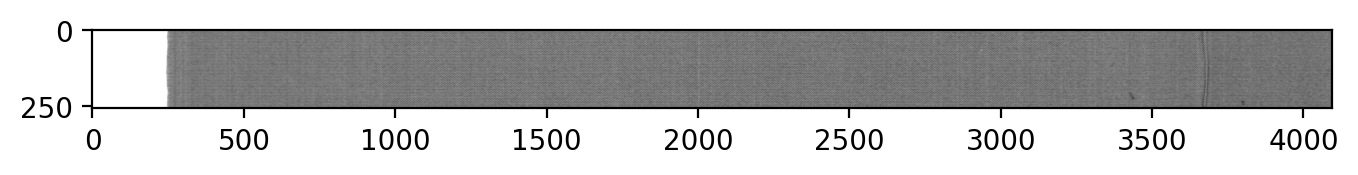

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200



master = cv2.imread("C:/Users/schof/LeedsUni/year3/individulaProject/tilingCode/0070_023_02.png")

plt.imshow(master)
plt.show()

Alternatively I can use opencv to display images.

In [ ]:
cv2.imshow('master Image',master)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

The tile class is used to store infomation about a tile.

In [ ]:
class Tile:   
    x = 0
    y = 0
    width = 0
    height = 0
    imagex = 0
    imagey = 0
    roi = 0

    def __init__(self,x, y, overlap, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.imagex = x * (width - overlap)
        self.imagey = y * (height - overlap)

    def populate(self,master):
        y = self.imagey
        x = self.imagex
        height = self.height
        width = self.width
        self.roi = master[y:y+height, x:x+width]

In [ ]:
image = np.array(master)  # can draw on this one, have to use np.copy or eles it passed by reference

tile1 = Tile(2,0,0,200,200)
tile1.populate(master)


def outlineTileParams(tile):
    startCo = (tile.imagex, tile.imagey)
    endCo = (tile.imagex+tile.width, tile.imagey+tile.width)
    color = (255, 0, 0)
    return[startCo,endCo,color]


params = outlineTileParams(tile1)

image = cv2.rectangle(image, params[0], params[1], params[2], 2)

plt.imshow(image)
plt.show()

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 100


plt.imshow(tile1.roi)
plt.show()

Here we have an example of a perfect tile, to the right of the whole image we can see three defects.

Now we create an array filled with these tiles.

In [ ]:
t_width = 64
t_height = 64
overlap = 0

# get dimensions of image
dimensions = image.shape
 
# height, width, number of channels in image
height = image.shape[0]
width = image.shape[1]
channels = image.shape[2]

tilesInX = width / (t_width - overlap)
tilesInY = height / (t_height - overlap)

tiles = []

for y in range(int(tilesInY)):
    row = []
    for x in range(int(tilesInX)):
        tile = Tile(x,y,overlap,t_width,t_height)
        tile.populate(master)
        row.append(tile)
    tiles.append(row)
    


Now we can start comparing tiles in order to find defects. The first method I tryed was Means Squared Error from:
https://www.tutorialspoint.com/how-to-compare-two-images-in-opencv-python#:~:text=Python%20%2D%20OpenCV%20%26%20PyQT5%20together&text=To%20compare%20two%20images%2C%20we,width%20and%20number%20of%20channels

In [ ]:
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

Now we have to create a known good tile we can compare against our defective tiles. 

In [ ]:
master_Tile1 = Tile(10,0,overlap,t_width,t_height)
master_Tile1.populate(master)

plt.imshow(master_Tile1.roi)
plt.show()

The code to compare and display:

In [ ]:
gMT_1 = cv2.cvtColor(master_Tile1.roi, cv2.COLOR_BGR2GRAY) #gray master tile

To compare we first convert to grey scale (learn why)

In [ ]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

Just to make the plots eaisier to see

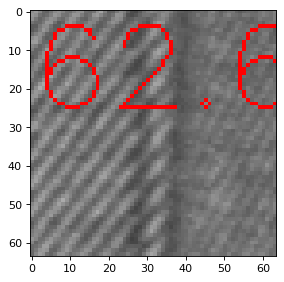

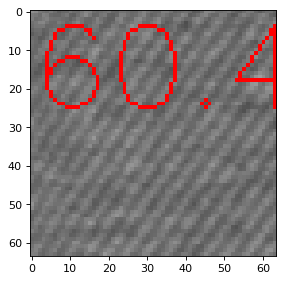

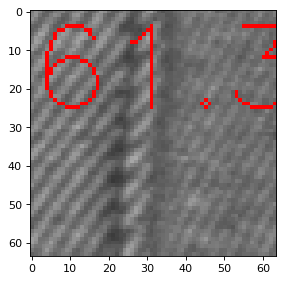

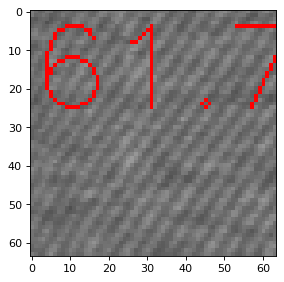

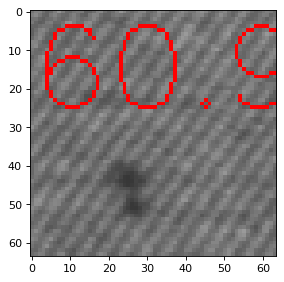

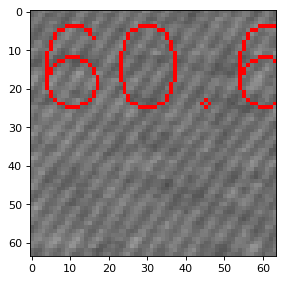

In [10]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (0,25)
fontScale              = 1
fontColor              = (255,0,0)
thickness              = 1
lineType               = 2

errorThresh = 60

for y in range(int(tilesInY)):
    for x in range(int(tilesInX)):
        gT = cv2.cvtColor(tiles[y][x].roi, cv2.COLOR_BGR2GRAY) #gray tile
        error, diff_1 = mse(gMT_1, gT)
        if error > errorThresh:
            img = np.copy(tiles[y][x].roi)

            cv2.putText(img,str(error), 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
            
            plt.imshow(img)
            plt.show()





We can clearly see that this does catch some defects but not all, however if we lower the threshold it can catch more defcets but more normal tiles.

In [ ]:
errorThresh = 58

for y in range(int(tilesInY)):
    for x in range(int(tilesInX)):
        gT = cv2.cvtColor(tiles[y][x].roi, cv2.COLOR_BGR2GRAY) #gray tile
        error, diff_1 = mse(gMT_1, gT)
        if error > errorThresh:
            img = np.copy(tiles[y][x].roi)

            cv2.putText(img,str(error), 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
            
            plt.imshow(img)
            plt.show()


With ower Threshold /\

To solve this i tried to compare each tile to 3 known good tiles and use their mean.

In [ ]:
master_Tile2 = Tile(17,2,overlap,t_width,t_height)
master_Tile2.populate(master)
plt.imshow(master_Tile2.roi)
plt.show()

master_Tile3 = Tile(30,1,overlap,t_width,t_height)
master_Tile3.populate(master)
plt.imshow(master_Tile3.roi)
plt.show()

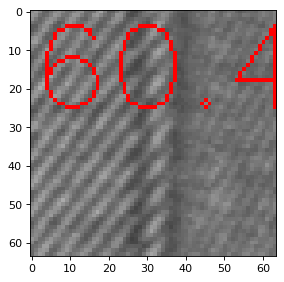

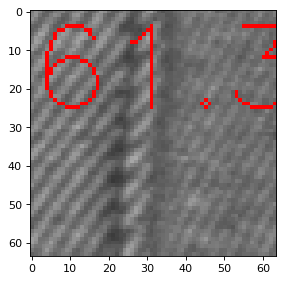

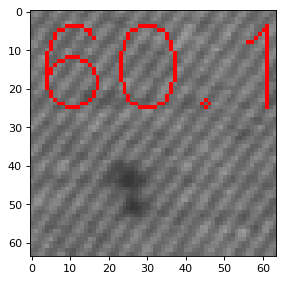

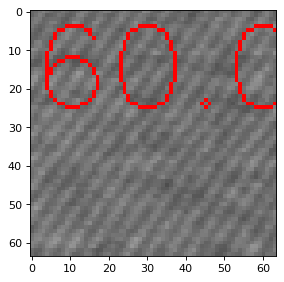

In [13]:

gMT_2 = cv2.cvtColor(master_Tile2.roi, cv2.COLOR_BGR2GRAY) #gray master tile
gMT_3 = cv2.cvtColor(master_Tile3.roi, cv2.COLOR_BGR2GRAY) #gray master tile


errorThresh = 60

for y in range(int(tilesInY)):
    for x in range(int(tilesInX)):
        gT = cv2.cvtColor(tiles[y][x].roi, cv2.COLOR_BGR2GRAY) #gray tile
        error_1, diff_1 = mse(gMT_1, gT)
        error_2, diff_2 = mse(gMT_2, gT)
        error_3, diff_3 = mse(gMT_3, gT)
        errors = np.array([error_1,error_2,error_3])
        error = np.mean(errors)
        if error > errorThresh:
            img = np.copy(tiles[y][x].roi)

            cv2.putText(img,str(error), 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)

            plt.imshow(img)
            plt.show()

In [14]:
print(master.shape)

(256, 4096, 3)


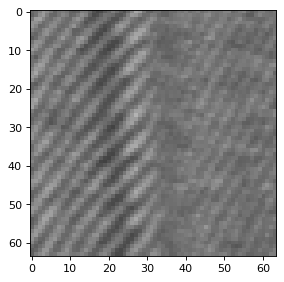

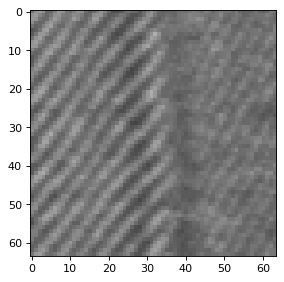

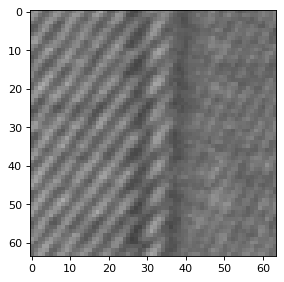

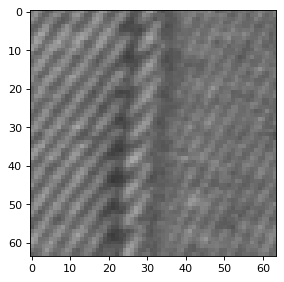

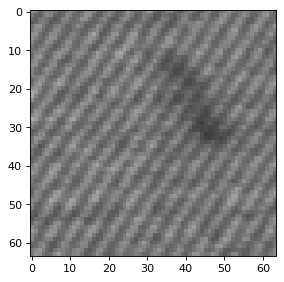

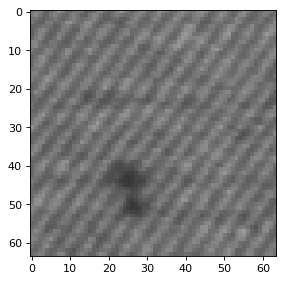

In [15]:
t_width = 64
t_height = 64
overlap = 0

defcetTiles = []
defcetTiles.append(Tile(57,0,overlap,t_width,t_height))
defcetTiles[0].populate(master)
plt.imshow(defcetTiles[0].roi)
plt.show()

defcetTiles.append(Tile(57,1,overlap,t_width,t_height))
defcetTiles[1].populate(master)
plt.imshow(defcetTiles[1].roi)
plt.show()

defcetTiles.append(Tile(57,2,overlap,t_width,t_height))
defcetTiles[2].populate(master)
plt.imshow(defcetTiles[2].roi)
plt.show()

defcetTiles.append(Tile(57,3,overlap,t_width,t_height))
defcetTiles[3].populate(master)
plt.imshow(defcetTiles[3].roi)
plt.show()

defcetTiles.append(Tile(53,3,overlap,t_width,t_height))
defcetTiles[4].populate(master)
plt.imshow(defcetTiles[4].roi)
plt.show()

defcetTiles.append(Tile(59,3,overlap,t_width,t_height))
defcetTiles[5].populate(master)
plt.imshow(defcetTiles[5].roi)
plt.show()

We can see in this paricular image there are 5 defective tiles, in the first method we did not catch all of them.

Hence I am going to try vlov detection from: https://www.analyticsvidhya.com/blog/2021/06/feature-detection-description-and-matching-of-images-using-opencv/

and:
https://learnopencv.com/blob-detection-using-opencv-python-c/

Most if not all fabrics are weaved and so after we convert to greyscale all should look like a repeating a pattern. Any defect will break this pattern and so look like blobs.

In [ ]:
im = cv2.cvtColor(master, cv2.COLOR_BGR2GRAY) #gray master tile

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 1000


plt.imshow(master)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()

Without any changeing it doesnt seem to work on the overall image it doesnt seem to work, next i will try on a defective tile.

A test to see if blob detection is working as intended, it is not.

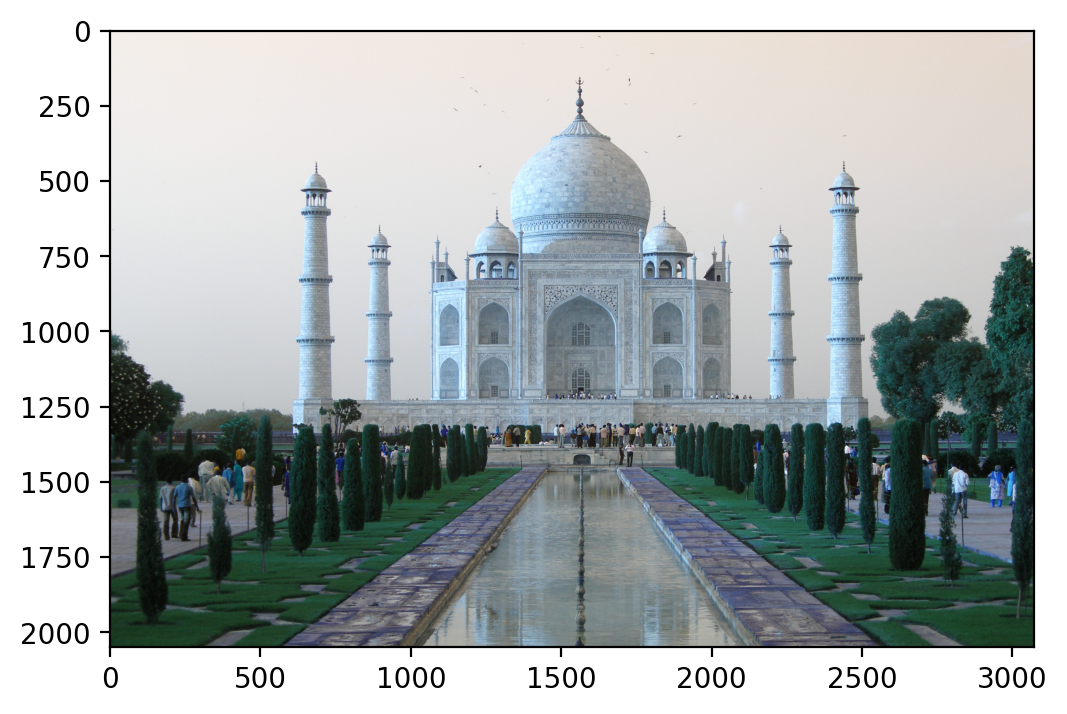

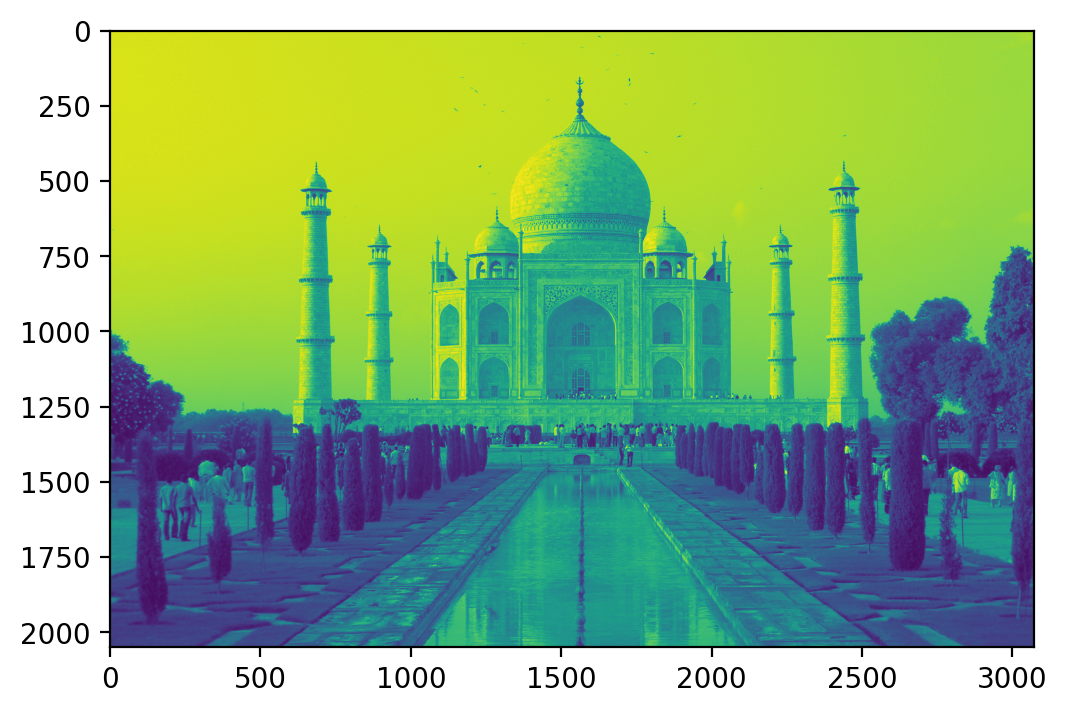

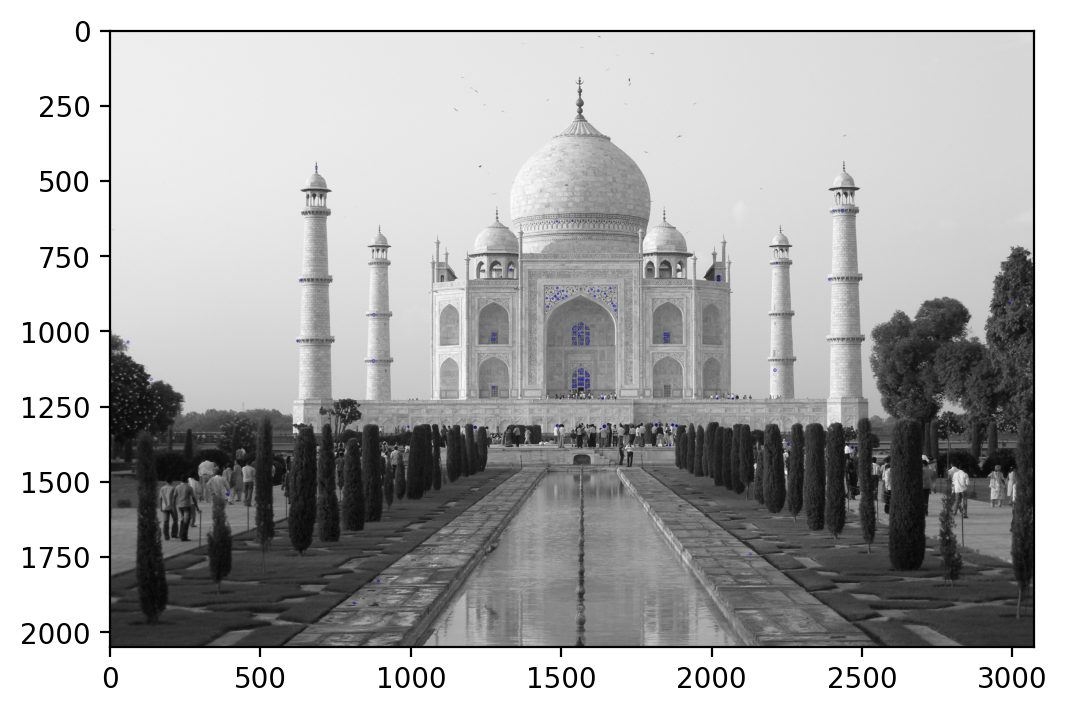

In [17]:
# blob detection test
ori = cv2.imread("C:/Users/schof/LeedsUni/year3/individulaProject/tilingCode/testTaj.jpg")
# im = cv2.cvtColor(ori, cv2.COLOR_BGR2GRAY) #gray tile
im = cv2.imread("C:/Users/schof/LeedsUni/year3/individulaProject/tilingCode/testTaj.jpg", cv2.IMREAD_GRAYSCALE)

# im = cv2.bitwise_not(im) #swaps black and white 
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200

# print(keypoints)

plt.imshow(ori)
plt.show()

plt.imshow(im)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()


A test to see if blob detection with params works better, it does not.

(< cv2.KeyPoint 00000169FB95E790>, < cv2.KeyPoint 00000169FB9122B0>, < cv2.KeyPoint 00000169FB912730>)


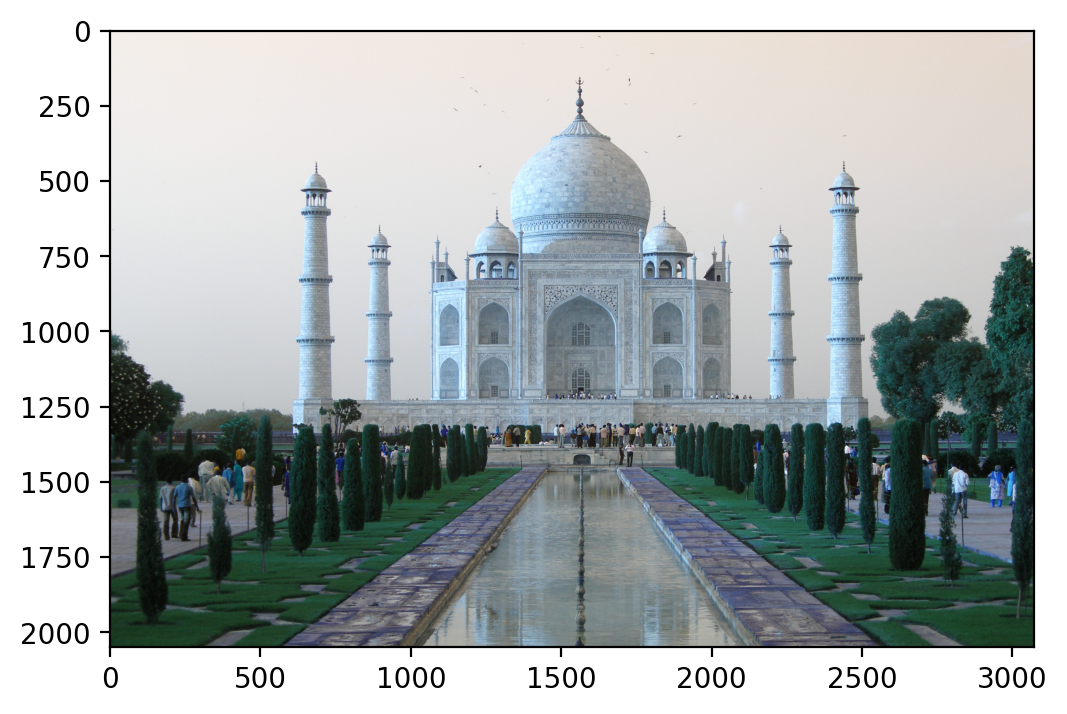

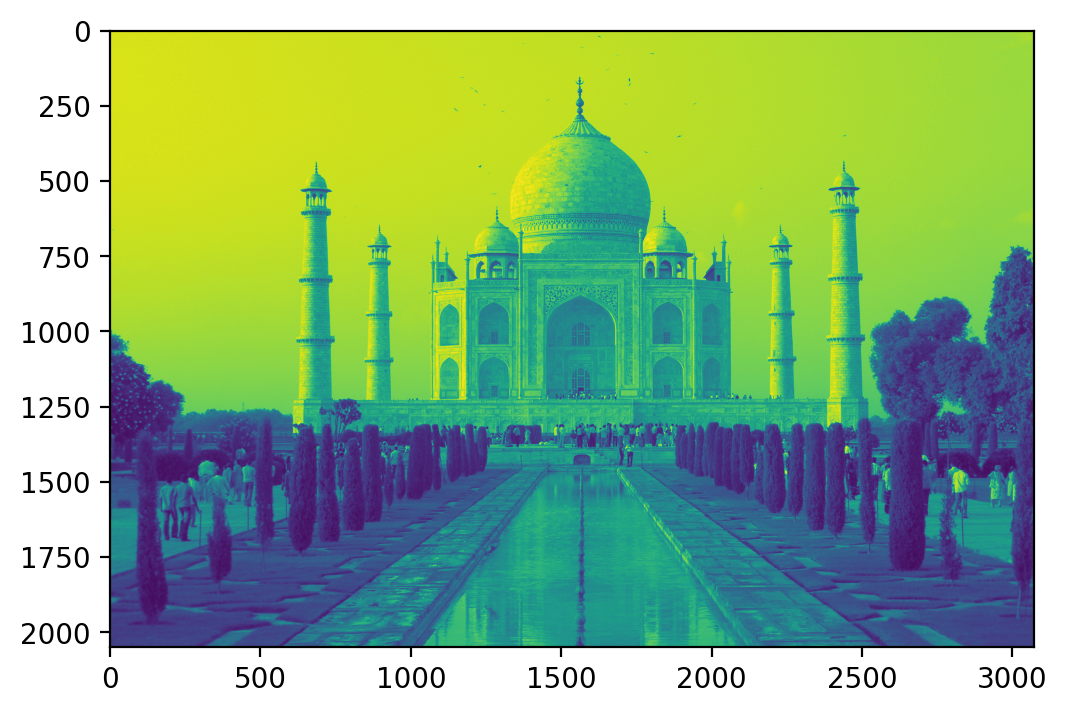

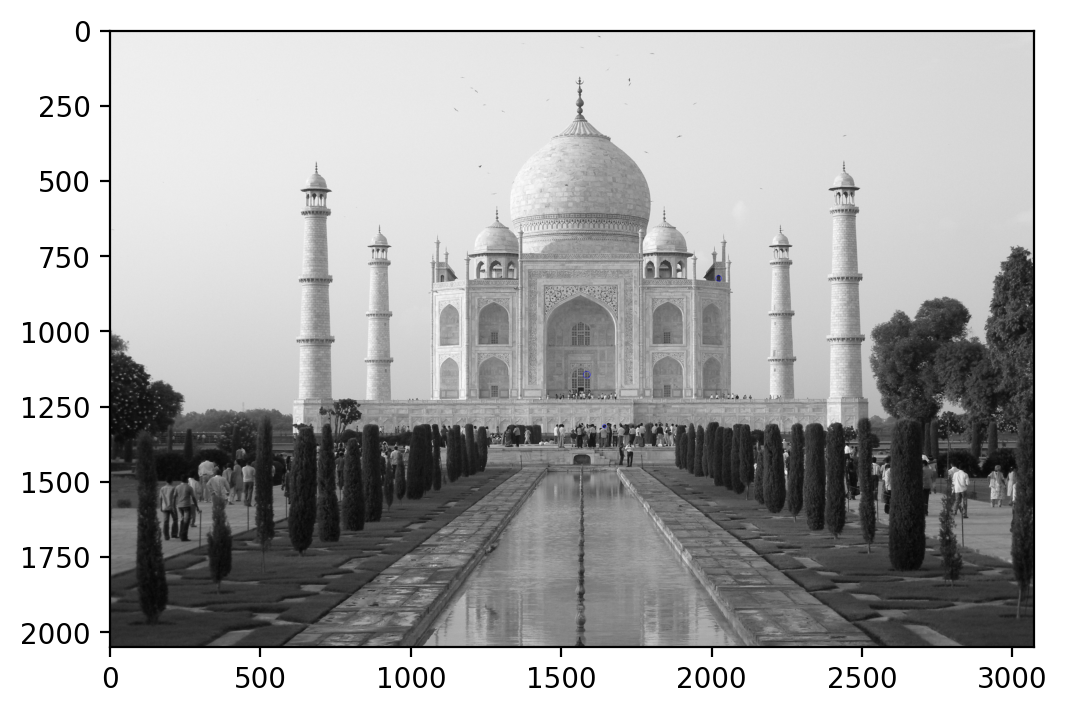

In [18]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# params.filterByColor = 1
# params.blobColor = 0
 
# Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 100
 
# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.1
 
# # Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.87
 
# # Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)

ori = cv2.imread("C:/Users/schof/LeedsUni/year3/individulaProject/tilingCode/testTaj.jpg")
# im = cv2.cvtColor(ori, cv2.COLOR_BGR2GRAY) #gray tile
im = cv2.imread("C:/Users/schof/LeedsUni/year3/individulaProject/tilingCode/testTaj.jpg", cv2.IMREAD_GRAYSCALE)
# im = cv2.bitwise_not(im) #swaps black and white 
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200

print(keypoints)

plt.imshow(ori)
plt.show()

plt.imshow(im)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()

()


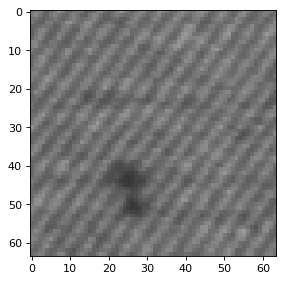

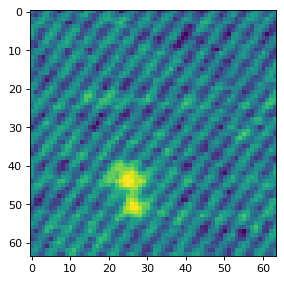

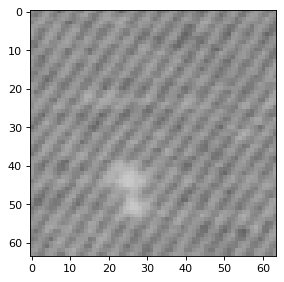

In [19]:
ori = defcetTiles[5].roi
im = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY) #gray tile

im = cv2.bitwise_not(im) #swaps black and white 
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

print(keypoints)

plt.imshow(ori)
plt.show()

plt.imshow(im)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()

(< cv2.KeyPoint 00000169F94F7900>, < cv2.KeyPoint 00000169FB8C1920>, < cv2.KeyPoint 00000169FB8C3300>, < cv2.KeyPoint 00000169FB913210>, < cv2.KeyPoint 00000169FB913D50>, < cv2.KeyPoint 00000169FB912490>)


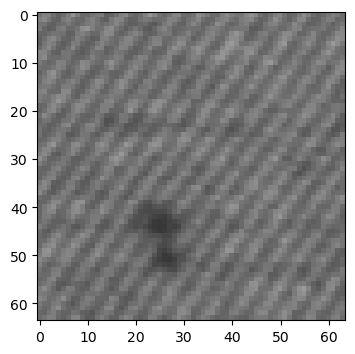

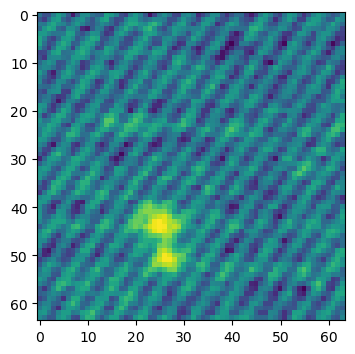

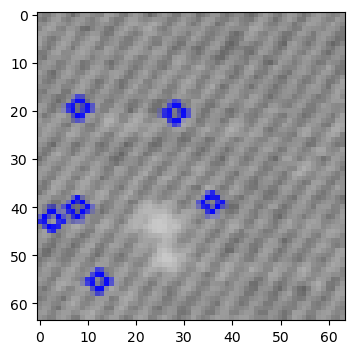

In [20]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# for dark blobs
# params.filterByColor = 1
# params.blobColor = 0
 
# for light blobs
# params.filterByColor = 1
# params.blobColor = 255
    
# Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 400;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 10
# params.maxArea = 300

 
# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.1
 
# # Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.87
 
# # Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.0
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)

ori = defcetTiles[5].roi
swaped = cv2.bitwise_not(ori) #swaps black and white as the algorithm looks for white pixels
im = cv2.cvtColor(swaped, cv2.COLOR_BGR2GRAY) #gray tile
# im = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY) #gray tile
# im = cv2.bitwise_not(im) #swaps black and white as the algorithm looks for white pixels
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 100

print(keypoints)

plt.imshow(ori)
plt.show()

plt.imshow(im)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()

Edge detection could be used on the long crease-like defects. first we need to blur the image to make edge detection easier.

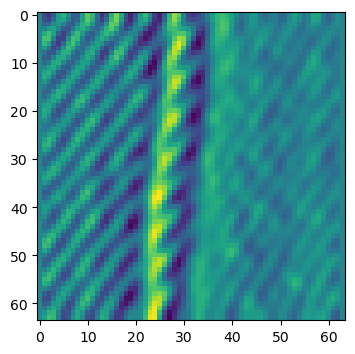

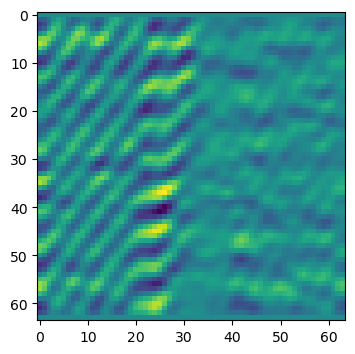

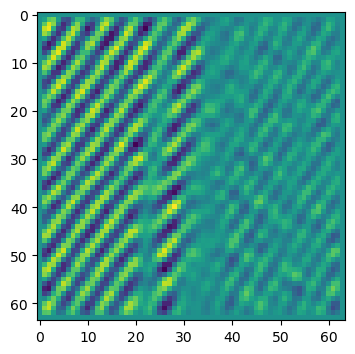

In [21]:
# Convert to graycsale
img_gray = cv2.cvtColor(defcetTiles[3].roi, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection


plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow(sobelxy)
plt.show()


Using canny edge detection

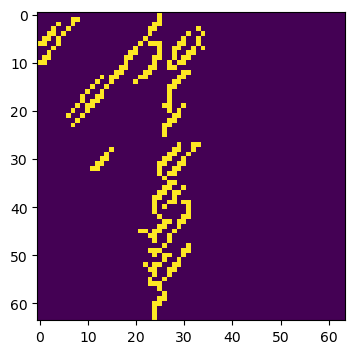

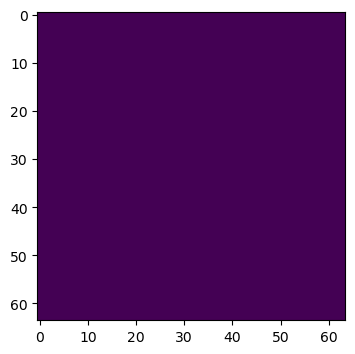

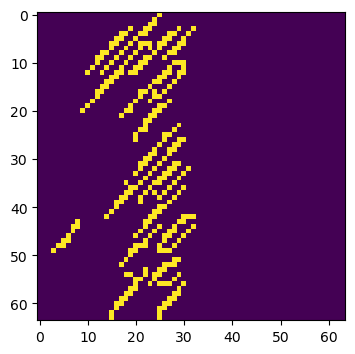

In [22]:
img_gray = cv2.cvtColor(defcetTiles[3].roi, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges)
plt.show()

# defect -------------------------
img_gray = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges)
plt.show()

# defect -------------------------
img_gray = cv2.cvtColor(defcetTiles[0].roi, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges)
plt.show()

Edge detection works well for large creases, bellow is trying blob detection doensnt realy work for this kind of defect.

(< cv2.KeyPoint 00000169FB8EB690>, < cv2.KeyPoint 00000169FB8E86C0>, < cv2.KeyPoint 00000169FB880870>)


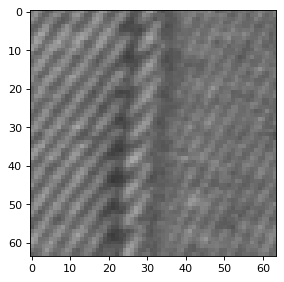

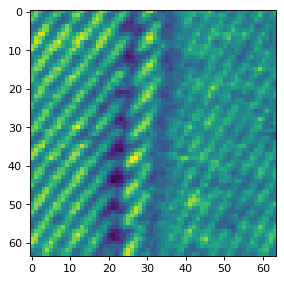

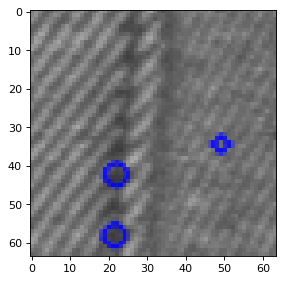

In [23]:
ori = defcetTiles[3].roi
im = cv2.cvtColor(defcetTiles[3].roi, cv2.COLOR_BGR2GRAY) #gray tile
# im = cv2.bitwise_not(im) #swaps black and white 
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

print(keypoints)

plt.imshow(ori)
plt.show()

plt.imshow(im)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()